# LABORATORIO 8 PARTE 2

* Diego Carrillo
* Jose Serrano

### Liberias

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  
import tensorflow as tf
import scipy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


### Análisis del problema            5


Se va a utilizar el dataset brindado por el profesor para poder clasificar si hay  o no un tatuaje. Se separará los datos para poder realizar un entrenamiento mas detallado y poder saber cuando hay un tatuaje y cuando no.


### Carga de datos                     10



primero se cargaran los datos para poder utilizarlos en todo el proceso.

In [9]:
withTattooPath = "tattoDetectorDataset-main/train/withTatto"
withoutTattooPath = "tattoDetectorDataset-main/train/withoutTatto"

### Visualizacion                        10



Se crea una funcion para poder mostrar las imagenes del dataset y poder saber con que se va a trabajar

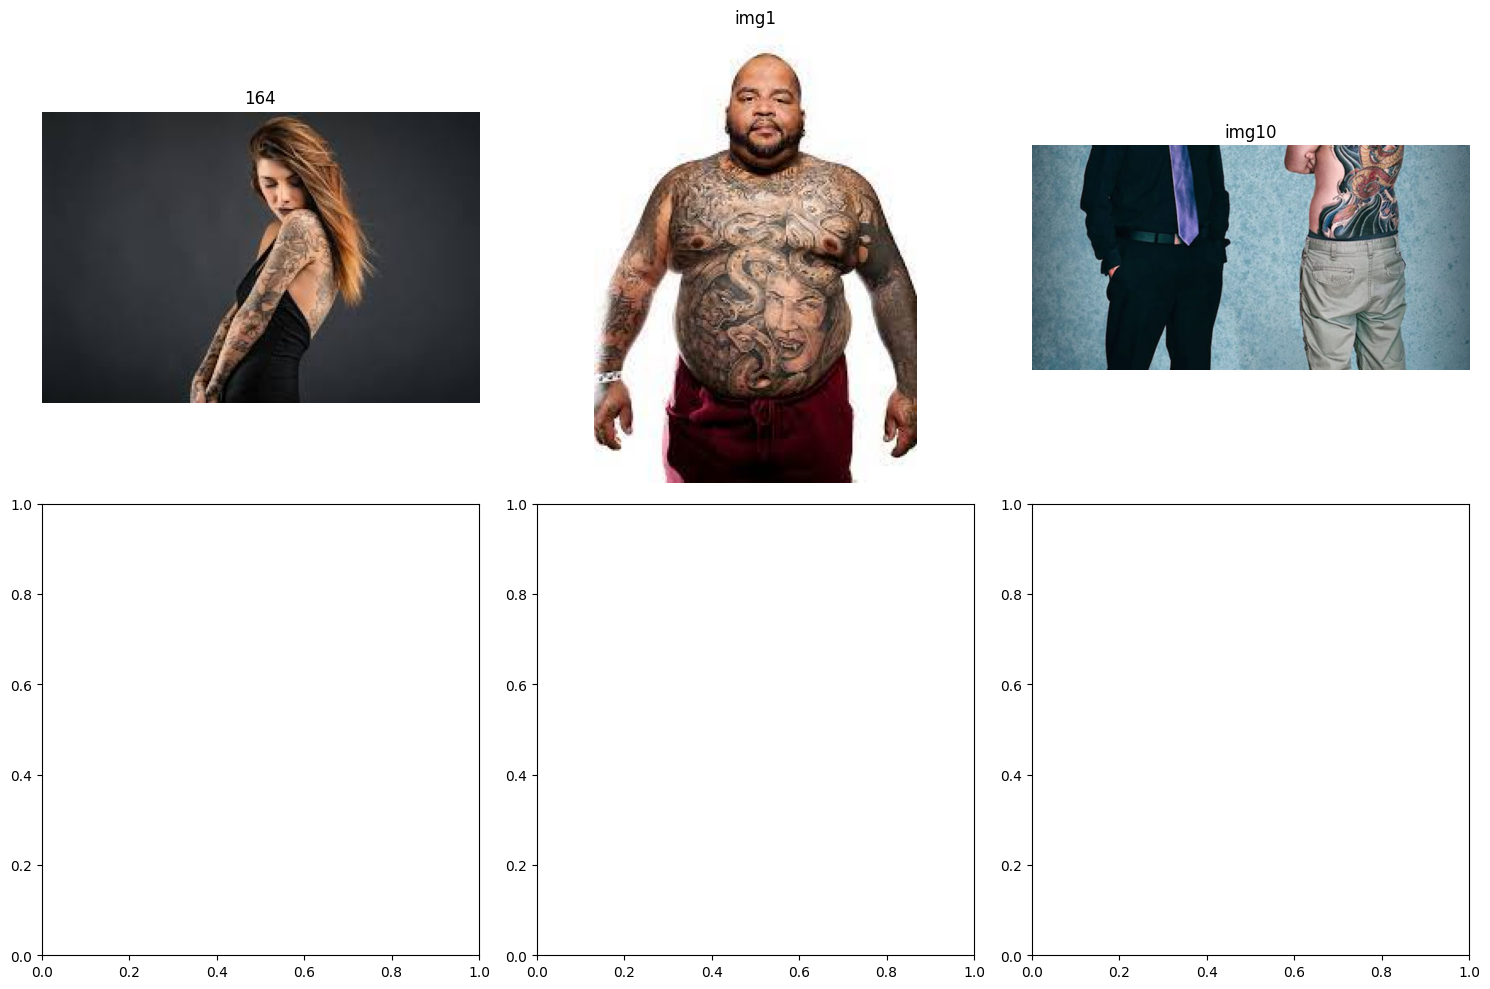

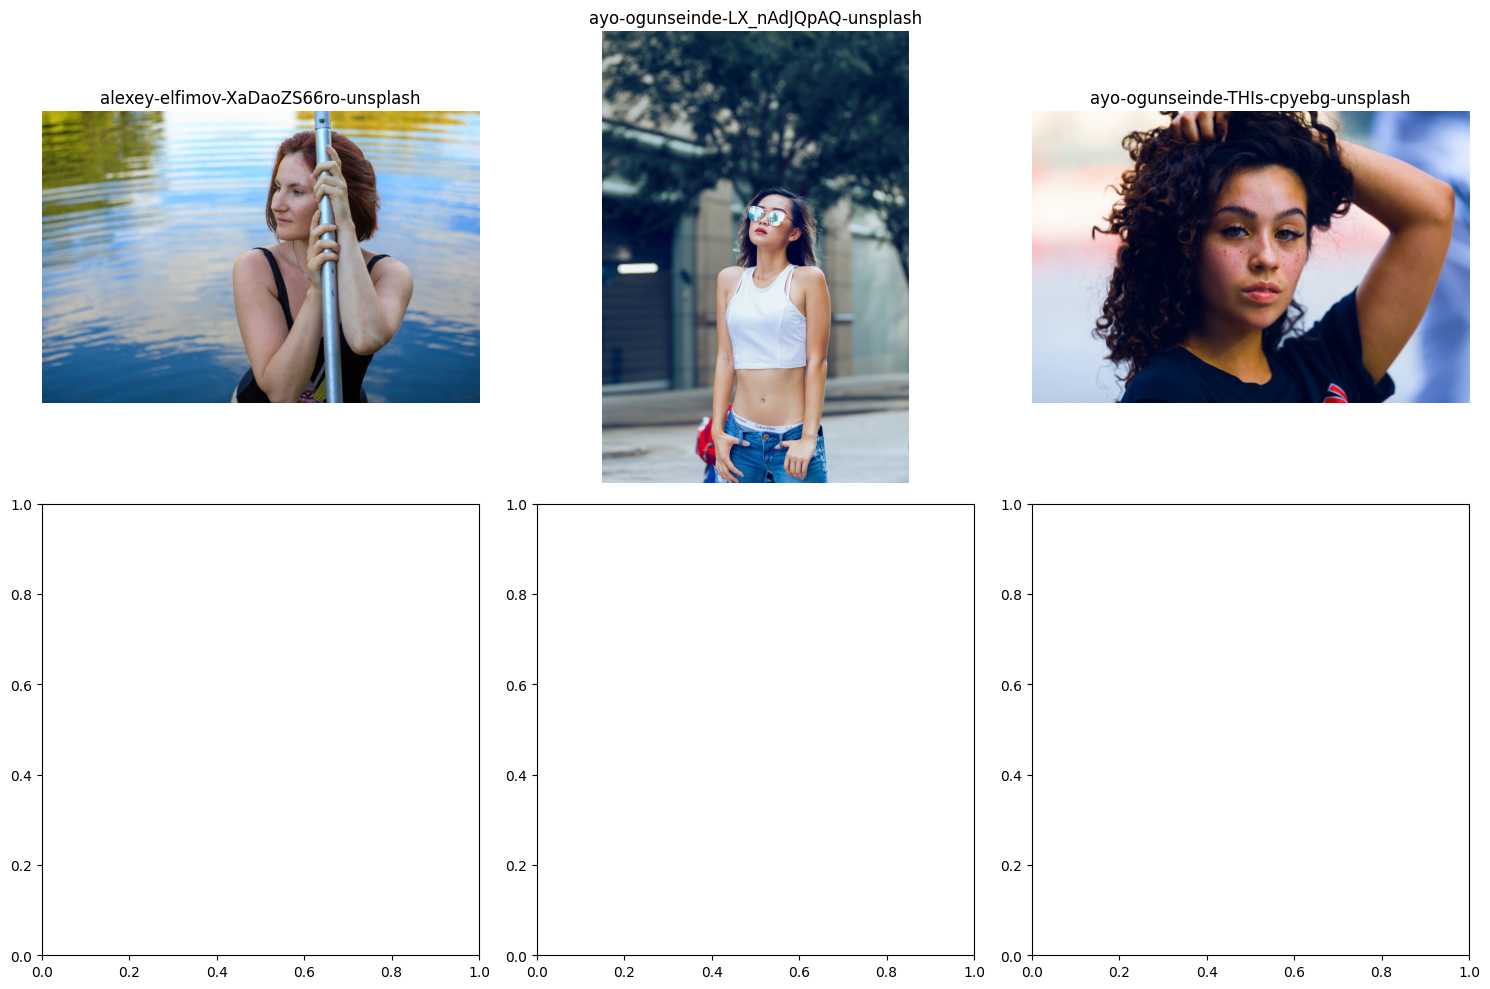

In [10]:
def display_images(path, num_images=6):
    image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
    
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(min(num_images, len(image_files))):
        image_file = image_files[i]
        label = image_file.split('.')[0]

        img_path = os.path.join(path, image_file)
        img = mpimg.imread(img_path)
        ax = axs[i // 3, i % 3]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)

    plt.tight_layout()
    plt.show()


display_images(withTattooPath, 3)


display_images(withoutTattooPath, 3)

### Preparación de los datos      10



In [19]:
train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    shear_range=0.2,      
    zoom_range=0.2,        
    horizontal_flip=True,   
    fill_mode='nearest'
)

train_gen = train_data.flow_from_directory(
    r'tattoDetectorDataset-main/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
     r'tattoDetectorDataset-main/val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
     r'tattoDetectorDataset-main/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 312 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Found 41 images belonging to 2 classes.


### Modelo de Deep Learning       40



In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),

    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    epochs=100,
    validation_data=val_generator, 
    callbacks=[model_checkpoint, early_stopping]
)

Epoch 1/100


C:\Users\diego\LAB8P2\LAB8P2\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 535ms/step - accuracy: 0.5012 - loss: 0.7515 - val_accuracy: 0.4340 - val_loss: 0.7271
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 390ms/step - accuracy: 0.5833 - loss: 0.6833 - val_accuracy: 0.4340 - val_loss: 0.7002
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.5681 - loss: 0.6842 - val_accuracy: 0.4340 - val_loss: 0.7004
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.5494 - loss: 0.6781 - val_accuracy: 0.4340 - val_loss: 0.6841
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5889 - loss: 0.6604 - val_accuracy: 0.4906 - val_loss: 0.6660
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 381ms/step - accuracy: 0.6148 - loss: 0.6580 - val_accuracy: 0.7170 - val_loss: 0.6220
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.6242 - loss: 0.6439 - val_accuracy: 0.6792 - val_loss: 0.5733
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.6079 - loss: 0.6261 - val_accuracy: 0.811

In [23]:
model.save("tattoo.keras")
model = tf.keras.models.load_model("tattoo.keras")


### Evaluación                            15 



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.6148 - loss: 0.6893
Test Loss: 0.6881847381591797
Test Accuracy: 0.6097561120986938
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


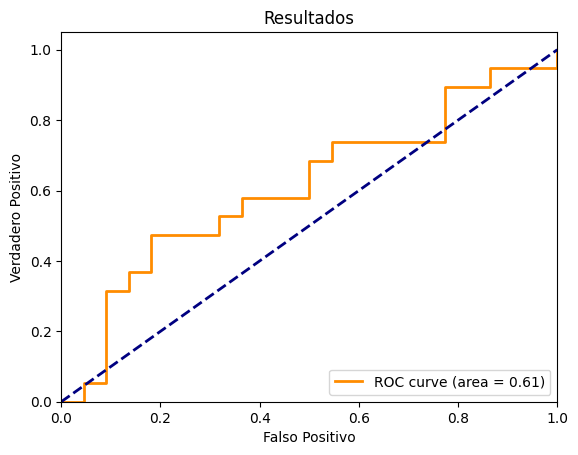

In [24]:
loss, accuracy = model.evaluate(test_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

true_labels = test_generator.classes
predicted_probabilities = model.predict(test_generator)

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Resultados')
plt.legend(loc="lower right")
plt.show()

### Resultados                            10

### Conclusión sobre el Modelo de Clasificación de Tatuajes

El modelo de clasificación de tatuajes ha obtenido una precisión del 60.98% y un Test Loss de 0.688. Estos resultados indican:

1. **Precisión Moderada**: El modelo clasifica correctamente los tatuajes en algo más de la mitad de los casos, pero aún hay margen de mejora.
2. **Test Loss Relativamente Alto**: Indica que hay una discrepancia notable entre las predicciones y los valores reales.

Para mejorar la precisión, es recomendable agregar más fotos al dataset, lo que ayudaría a que el modelo aprenda mejor las características distintivas de los tatuajes. Además, se pueden considerar mejoras en los hiperparámetros y la arquitectura del modelo.